# ETUDE DU DATASET : VACCINATION PAR PATHOLOGIE EN FRANCE

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
df = pd.read_csv('donnees-vaccination-par-pathologie.csv', sep = ';')

Le dataset étudié ici regroupe des informations relatives à la vaccination en France, classées par pathologie et par département.

# PARTIE 1 : Analyse préliminaire et nettoyage du dataset :

Nous faisons un .describe() afin d'avoir une vue d'ensemble sur le dataset :

In [152]:
df.describe(include = 'all')

,date,regroupement_pathologie,pathologie,region_residence,libelle_region,departement_residence,libelle_departement,population_ref_cartographie,population_patho_cartographie,effectif_1_inj_pathologie,effectif_termine_pathologie,taux_1_inj_pathologie,taux_termine_pathologie,ordre,effectif_rappel_pathologie,effectif_eligible_rappel_patho,effectif_rappel_parmi_eli_patho,taux_rappel_pathologie,taux_rappel_eligible_pathologie
count,6726,6726,6726,6726,6669,6726,6726,6.726000e+03,6.577000e+03,6.563000e+03,6.563000e+03,6563.000000,6563.000000,5900.000000,6.519000e+03,6.563000e+03,6.519000e+03,6519.000000,6519.000000
unique,1,8,52,18,17,101,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2023-01-01,Pathologies psychiatriques et neurologiques,Toutes pathologies de la catégorie,76,Occitanie,Tout département,FRANCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6726,1770,708,798,798,1026,1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.381890e+06,4.562986e+04,4.173586e+04,4.152714e+04,0.893130,0.887416,25.500000,3.767564e+04,4.169751e+04,3.767108e+04,0.774680,0.862196
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.091817e+06,4.075124e+05,3.728386e+05,3.711108e+05,0.096599,0.099804,14.432093,3.370975e+05,3.725117e+05,3.370597e+05,0.134071,0.090043
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.040000e+04,1.000000e+01,1.000000e+01,1.000000e+01,0.349000,0.338000,1.000000,1.000000e+01,1.000000e+01,1.000000e+01,0.160000,0.278000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.668300e+05,8.600000e+02,7.500000e+02,7.500000e+02,0.891000,0.885000,13.000000,6.500000e+02,7.500000e+02,6.500000e+02,0.744000,0.838000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.491700e+05,3.290000e+03,2.970000e+03,2.950000e+03,0.919000,0.914000,25.500000,2.660000e+03,2.970000e+03,2.660000e+03,0.813000,0.891000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.935800e+05,1.526000e+04,1.395500e+04,1.389500e+04,0.939000,0.935000,38.000000,1.253500e+04,1.394500e+04,1.253500e+04,0.860000,0.921000


Nous voyons que dans la ligne "count", le jeu de données n'est pas complet : toutes les colonnes ne contiennent pas le même nombre de données. Il y a donc des valeurs manquantes.

Regardons où se situent les données manquantes.

In [153]:
display(df.isna().sum())
print("\nEn tout, il manque",df.isna().sum().sum(),"valeurs")

date                                 0
regroupement_pathologie              0
pathologie                           0
region_residence                     0
libelle_region                      57
departement_residence                0
libelle_departement                  0
population_ref_cartographie          0
population_patho_cartographie      149
effectif_1_inj_pathologie          163
effectif_termine_pathologie        163
taux_1_inj_pathologie              163
taux_termine_pathologie            163
ordre                              826
effectif_rappel_pathologie         207
effectif_eligible_rappel_patho     163
effectif_rappel_parmi_eli_patho    207
taux_rappel_pathologie             207
taux_rappel_eligible_pathologie    207
dtype: int64


En tout, il manque 2675 valeurs


Le set de données est semble plutôt complet : pour chaque colonne il manque (si nous excluons la colonne "ordre") au maximum 207 valeurs, sachant que le dataset contient 6726 lignes. Cela représente donc 3% des données.
Nous allons enlever la colonne "ordre" qui n'est pas bien définie et qui en plus contient de nombreuses lacunes.

In [154]:


col = df.columns.to_list()
col.remove('ordre')
df = df[col]

nv_col = df.columns.to_list()
print( 'ordre' in nv_col)

False


Nous avons bien réussi à retirer la colonne 'ordre'.

Nous remarquons par ailleurs que sur plusieurs colonnes il manque 163 ou 207 valeurs, nous pouvons en déduire que souvent, se sont les mêmes lignes qui sont incomplètes.
Essayons d'étudier le nombre de données manquantes par ligne : 

Text(0.5, 1.0, "Nombre de valeurs manquantes en fonction de l'indice")

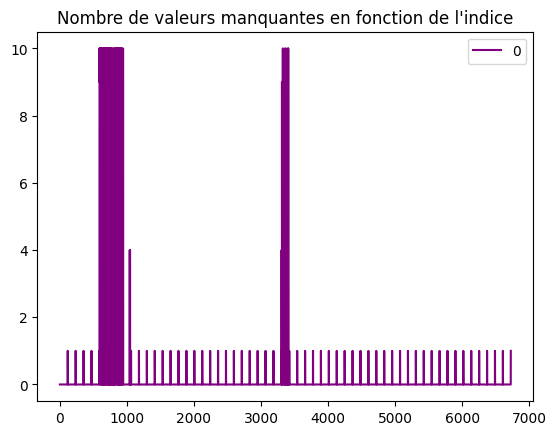

In [155]:
df.isna().sum(axis=1).to_frame().plot(c='purple')
plt.title("Nombre de valeurs manquantes en fonction de l'indice")

Le graphique montre qu'il y a certes certaines lignes avec de nombreuses lacunes (notamment situées au niveau de la ligne 800), mais il est difficile de compter combien de lignes sont affectées par ces lacunes.
Faisons-le avec pandas:

In [156]:
df1 = df.isna().sum(axis=1).to_frame(name='nb de valeurs manquantes')
df1[df1['nb de valeurs manquantes'] >= 1].value_counts(sort = True)

nb de valeurs manquantes
10                          149
1                            57
4                            44
9                            14
Name: count, dtype: int64

In [157]:
print("Nous avons bien seulement", df1[df1['nb de valeurs manquantes'] >= 1].value_counts().sum(), "lignes à trous.")

Nous avons bien seulement 264 lignes à trous.


Les lacunes sont donc bien regroupées par ligne, ce qui diminue le nombre de lignes affectées par un manque de données.
Ainsi, 96% des lignes sont "saines".

## Conclusion sur le nettoyage du dataset :
Le dataset est plutôt complet car les manques de données se situent sur les mêmes lignes.
Au vue du nombre de départements affectés à chaque pathologie, nous pouvons considérer que cela n'affectera pas les études réalisées par la suite, qui utilisent un moyennage par pathologie ou par département.

# Dernière remarque :
Quand on observe le fichier sur VS code, on remarque que à partir de la ligne 3070 et jusqu'à la ligne 3541, il y a deux arguments dans la colonne pathologie au lieu d'un. 

On peut observer cela en regardant la ligne 3070 => embolie pulmonaire est rajoutée.

In [158]:
df.loc[3070]

date                                                                      2023-01-01
regroupement_pathologie            Maladies respiratoires chroniques, embolie pul...
pathologie                                                        Embolie pulmonaire
region_residence                                                                  84
libelle_region                                                  Auvergne-Rhône-Alpes
departement_residence                                                             03
libelle_departement                                                           Allier
population_ref_cartographie                                                   274670
population_patho_cartographie                                                 1110.0
effectif_1_inj_pathologie                                                     1030.0
effectif_termine_pathologie                                                   1030.0
taux_1_inj_pathologie                                            

On va remplacer le contenu de la colonne "regroupement_pathologie" par "Maladies respiratoires chroniques" de la ligne 3070 à la ligne 3541.

In [159]:
df.loc[3070:3541, df.columns[1]]="Maladies respiratoires chroniques"
df.to_csv('C:/Users/Utilisateur/cours-info/Projet-vaccination/donnees-vaccination-par-pathologie_nettoyé.csv', index=False)

In [160]:
# On peut vérifier que le problème est résolu :
df.loc[3070]

date                                                      2023-01-01
regroupement_pathologie            Maladies respiratoires chroniques
pathologie                                        Embolie pulmonaire
region_residence                                                  84
libelle_region                                  Auvergne-Rhône-Alpes
departement_residence                                             03
libelle_departement                                           Allier
population_ref_cartographie                                   274670
population_patho_cartographie                                 1110.0
effectif_1_inj_pathologie                                     1030.0
effectif_termine_pathologie                                   1030.0
taux_1_inj_pathologie                                          0.926
taux_termine_pathologie                                        0.922
effectif_rappel_pathologie                                     930.0
effectif_eligible_rappel_patho    

# PARTIE 2 : ETUDE DES PATHOLOGIES 

Nous allons désormais étudier les données relatives spécifiquement aux pathologies.

## La répartition des pathologies :

Commençons par étudier la manière dont les pathologies sont représentées à l'échelle de la France :

,0
pathologie,
Accident vasculaire cérébral,118
Artériopathie oblitérante du membre inférieur,118
Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés,118
Autres cancers en phase active de traitements,118
Autres cancers sous surveillance,118
Cancer colorectal en phase active de traitement,118
Cancer colorectal sous surveillance,118
Cancer de la prostate en phase active de traitement,118
Cancer de la prostate sous surveillance,118


Text(0.5, 1.0, 'Occurences par pathologies en France')

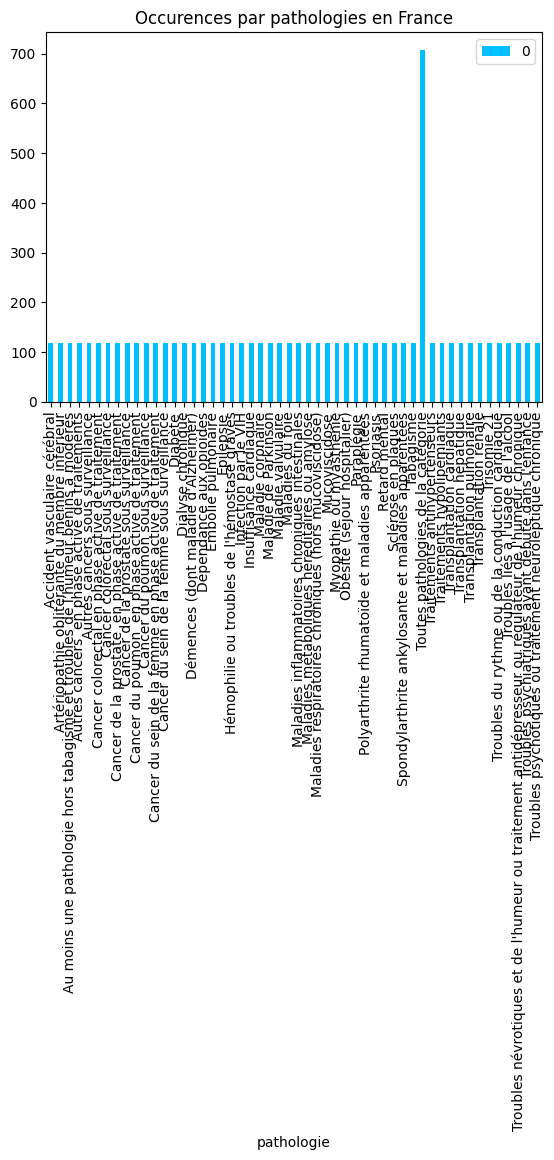

In [161]:
df2 = df.groupby(by='pathologie').size().to_frame()
display(df2)
df2.plot.bar(color='deepskyblue')
plt.title('Occurences par pathologies en France')

Nous remarquons que la pathologie la plus représentée est "Toutes pathologies de la catégorie"... Il est difficile de comprendre ce qui est derrière.
En revanche, les autres maladies sont réparties de manière uniforme : nous pouvons le vérifier en augmentant le paramètre du .head().
Ce qui est cohérent puisque chaque maladie est représentée une fois par département.

Interprétation : cette catégorie regroupe un ensemble de pathologies, ce qui explique le nombre d'occurences élevées.

## La répartition des régions :
Etudions maintenant la manière dont sont réparties les régions sur ce dataset : 

,0
libelle_region,
Auvergne-Rhône-Alpes,741
Bourgogne-Franche-Comté,513
Bretagne,285
Centre-Val de Loire,399
Corse,171
Grand Est,627
Guadeloupe,114
Guyane,114
Hauts-de-France,342


Text(0.5, 1.0, 'Occurences par région')

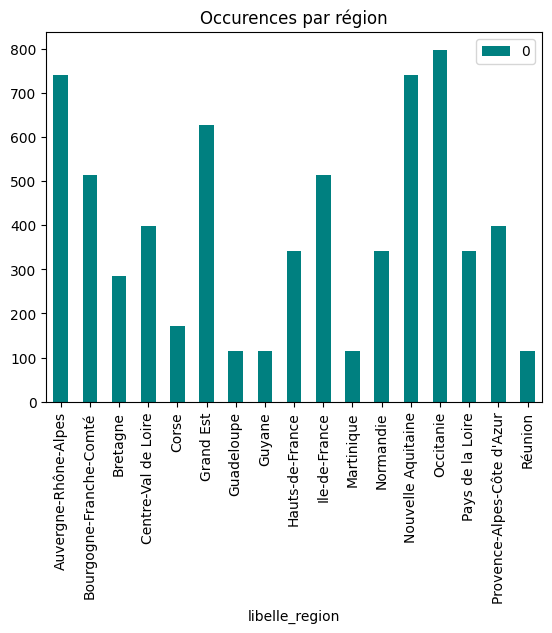

In [162]:
df3 = df.groupby(by = 'libelle_region').size().to_frame()
display(df3)
df3.plot.bar(color = 'teal')
plt.title('Occurences par région')

La répartition est bien inégale en fonction des régions.
Cela est dû au fait que les données sont classées par département. Ainsi, si certaines régions apparaissent de nombreuses fois, cela signifie qu'elles contiennent plus de départements que les autres. Cela concerne en particulier l'Occitanie, l'Auvergne-Rhône-Alpes et la Nouvelle Aquitaine.

Néanmoins, cela ne signifie pas forcément qu'il y a plus d'habitants dans ces régions, mais simplement qu'elles sont divisées en plus de département.

Pour s'intéresser à la densité, conduisons la même étude, par département cette fois-ci :
nous commençons par reprendre le graphe précédent par département

libelle_departement
FRANCE    1026
dtype: int64

Text(0.5, 1.0, 'Occurences par département')

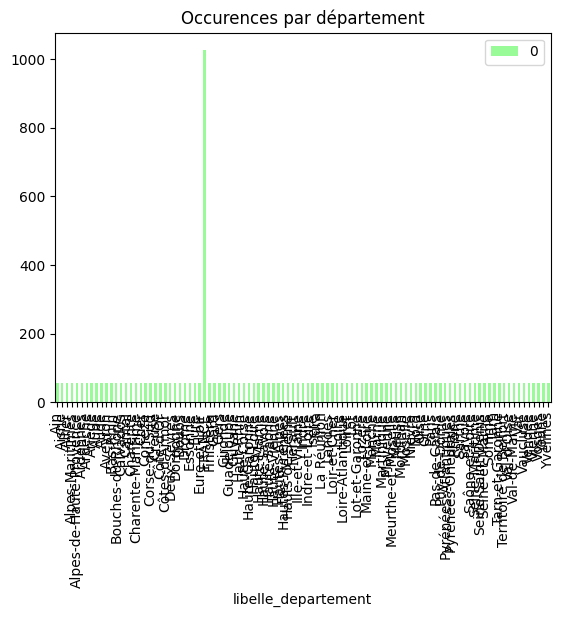

In [163]:
df4 = df.groupby(by = 'libelle_departement').size()
display(df4.head(df4.argmax()+1).tail(1))
df4.to_frame().plot.bar(color = 'palegreen')
plt.title('Occurences par département')

Pour chaque département, la répartition est bien uniforme. Sauf pour un, celui référencé 'FRANCE'. 
Nous comprenons que les données sont rangées par pathologies, puis par département, et qu'à la fin de chaque bloc d'une même pathologie, l'étude est reprise dans chaque région mais tout département confondu ! Nous pouvons le retirer par la suite.

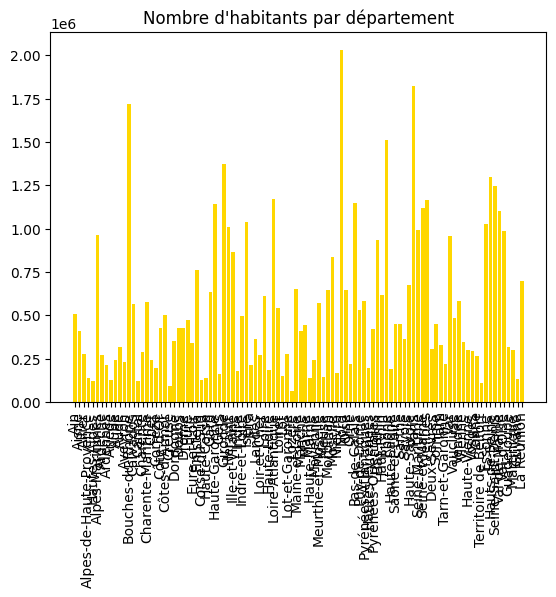

In [164]:
df5 = df[df['libelle_departement'] != 'FRANCE']
plt.bar(df5['libelle_departement'],df5['population_ref_cartographie'], color= 'gold')
plt.title("Nombre d'habitants par département")
plt.xticks(rotation=90)
plt.show()

In [165]:
group=df5.groupby('libelle_departement')['population_ref_cartographie'].mean()
print (group)


libelle_departement
Ain                         505020.0
Aisne                       411650.0
Allier                      274670.0
Alpes-Maritimes             962630.0
Alpes-de-Haute-Provence     138860.0
                             ...    
Vendée                      584560.0
Vienne                      345620.0
Vosges                      296210.0
Yonne                       266830.0
Yvelines                   1167440.0
Name: population_ref_cartographie, Length: 100, dtype: float64


In [166]:
valeur_max = group.max()
indice_max = group.idxmax()
indice_max, valeur_max

('Nord', np.float64(2031410.0))

## Interprétation :
Le graphique précédant nous montre bien une répartition inégale de la population au sein des départements. Notamment, les Hauts-de-France Nord constituent le département le plus peuplé, avec 2 031 410 habitants.

# Part de la population malade sur la population totale
Etudions enfin le ratio de la population malade sur celui de la population totale :
Nous choisissons de prendre uniquement la première catégorie de pathologie nommée "Au moins une pathologie hors tabagisme", car elle nous semble représenter un ensemble de pathologie.

In [167]:
dep = df['libelle_departement'].unique()[:-1]
df6 = df.filter(items=[i for i in range(len(dep))],axis=0)
df6['ratio'] = df6['population_patho_cartographie']/df6['population_ref_cartographie']
df6= df6[['libelle_departement','ratio']]
moy = df6['ratio'].mean()
ecart_type = df6.describe().loc['std','ratio']
print('Il y a en moyenne',round(moy*100,2),'% de la population atteinte par au moins une pathologie hors tabagisme.')

Il y a en moyenne 38.94 % de la population atteinte par au moins une pathologie hors tabagisme.


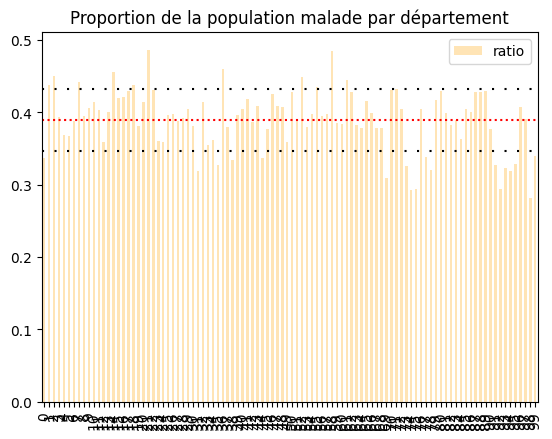

In [168]:

df6.plot.bar(color = 'moccasin')
plt.axhline(y=moy, c='red', linestyle=':')
plt.axhline(y=moy+ecart_type, c='black', linestyle=(0,(1,5)))
plt.axhline(y=moy-ecart_type, c='black', linestyle=(0,(1,5)))
plt.title("Proportion de la population malade par département")
plt.xticks(rotation=90)
plt.show()

La moyenne est de presque 0,4, environ 4 personnes sur 10 sont donc atteintes par au moins une pathologie.
Etudions en particulier le cas du cancer : 

En moyenne, 1.24 % de la population souffre d'un cancer


Text(0.5, 1.0, "Proportion de la population atteinte d'un cancer par département")

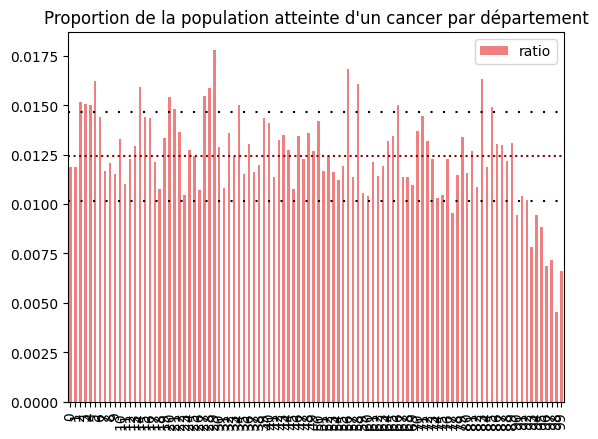

In [169]:
col = ['libelle_departement','population_patho_cartographie','population_ref_cartographie']
df7 = df[df['regroupement_pathologie'] == 'Cancers actifs'][col].head(len(dep)).reset_index()
col1 = df7['population_patho_cartographie'].to_frame().reset_index()
col2 = df[df['regroupement_pathologie'] == 'Cancers sous surveillance']['population_patho_cartographie'].head(len(dep)).to_frame().reset_index()
somme = col1 + col2
df7['pop_cancer'] = somme['population_patho_cartographie']
df7['ratio'] = df7['population_patho_cartographie']/df7['population_ref_cartographie']
ecart_type_cancer = df7[['libelle_departement','ratio']].describe().loc['std','ratio']
moy_cancer = df7['ratio'].mean()
print('En moyenne,',round(moy_cancer*100,2),"% de la population souffre d'un cancer")
df7[['libelle_departement','ratio']].plot.bar(color='lightcoral')
plt.axhline(y=moy_cancer, c='darkred', linestyle=':')
plt.axhline(y=moy_cancer+ecart_type_cancer, c='black', linestyle=(0,(1,5)))
plt.axhline(y=moy_cancer-ecart_type_cancer, c='black', linestyle=(0,(1,5)))
plt.title("Proportion de la population atteinte d'un cancer par département")

# PARTIE 3 : Etude de la vaccination

Enfin, dans cette partie, nous nous intéressons plus spécifiquement à la vaccination.

Commençons pour le premier histogramme à représenter simplement la distribution du taux de première injection par département pour deux pathologies différentes :

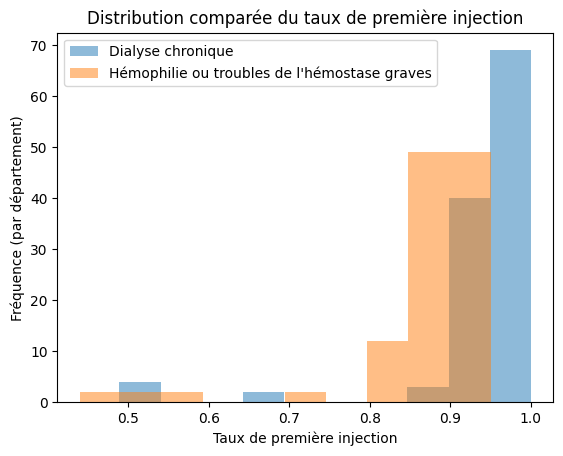

In [170]:

patho_1 = df[df['pathologie'] == "Dialyse chronique"]["taux_1_inj_pathologie"]
patho_2 = df[df['pathologie'] == "Hémophilie ou troubles de l'hémostase graves"]["taux_1_inj_pathologie"]

plt.hist(patho_1, bins=10, alpha=0.5, label='Dialyse chronique')
plt.hist(patho_2, bins=10, alpha=0.5, label="Hémophilie ou troubles de l'hémostase graves")

plt.xlabel('Taux de première injection')
plt.ylabel('Fréquence (par département)')
plt.title('Distribution comparée du taux de première injection')
plt.legend()
plt.show()


## Interprétation :
La distribution du taux de première injection diffère pour les deux pathologies (Plus de vaccination pour la dialyse chronique que pour l'hémophilie ou troubles de l'hémostase graves). Néanmoins, le taux est en moyenne situé aux alentours de 90%, ce que la suite de l'étude nous confirmera.

# TAUX MOYEN DE VACCINATION COMPLETE PAR PATHOLOGIE

Regardons si certaines pathologies se caractérisent par un taux de vaccination inférieur aux autres.

Remarque : Nous décidons d'enlever pour ce point les lignes "Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés" et "Toutes pathologies de la catégorie" qui regroupent plusieurs pathologies apparaissant déjà.

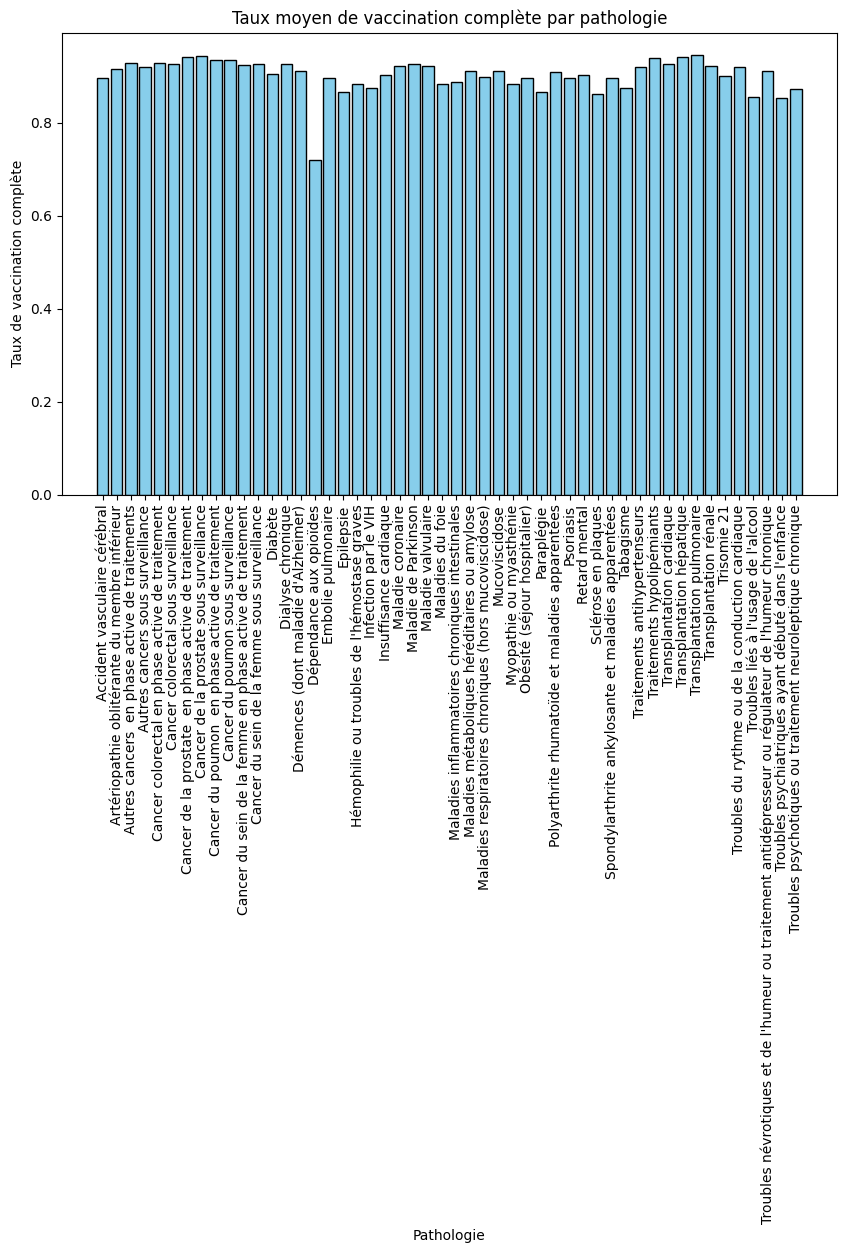

In [171]:
# TAUX MOYEN DE VACCINATION COMPLETE PAR PATHOLOGIE

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

pathologie_toute_région= df[df["region_residence"]== "Toute région"]
pathologie_toute_région=pathologie_toute_région[~ pathologie_toute_région['pathologie'].isin(exclusions)]

moyenne_taux_par_patho = pathologie_toute_région.groupby('pathologie')['taux_termine_pathologie'].mean()

plt.figure(figsize=(10, 6))  # Taille du graphique
plt.bar(moyenne_taux_par_patho.index, moyenne_taux_par_patho.values, color='skyblue', edgecolor='black')
plt.xlabel('Pathologie')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par pathologie')
plt.xticks(rotation=90)  # On tourne le nom des pathologies pour plus de lisibilité
plt.show()


## Interprétation de l'histogramme : 
Les taux moyens de vaccination pour l'ensemble des pathologies se situent aux alentours de 90% (ce que nous avions vu grossièrement précédemment). Néanmoins, une des pathologies présente un taux inférieur aux autres : la dépendance aux opioïdes, avec un taux de 70%.

Les opioïdes, tels que le fentanyl, l'héroïne, la morphine, sont des substances agissant sur le système nerveux central et provoquent à forte dose une dépendance accrue.

La dépendance aux drogues constitue ainsi un frein à la vaccination. Il peut être intéressant d'étudier les facteurs à l'origine de ce taux inférieur et de l'améliorer.

# TAUX DE VACCINATION PAR REGION:

Maintenant, observons la distribution des taux de vaccination par région et vérifions si certaines sont marquées par un taux inférieur aux autres.

# TAUX DE VACCINATION PAR DEPARTEMENT :

Affinons notre recherche en nous intéressant aux départements.

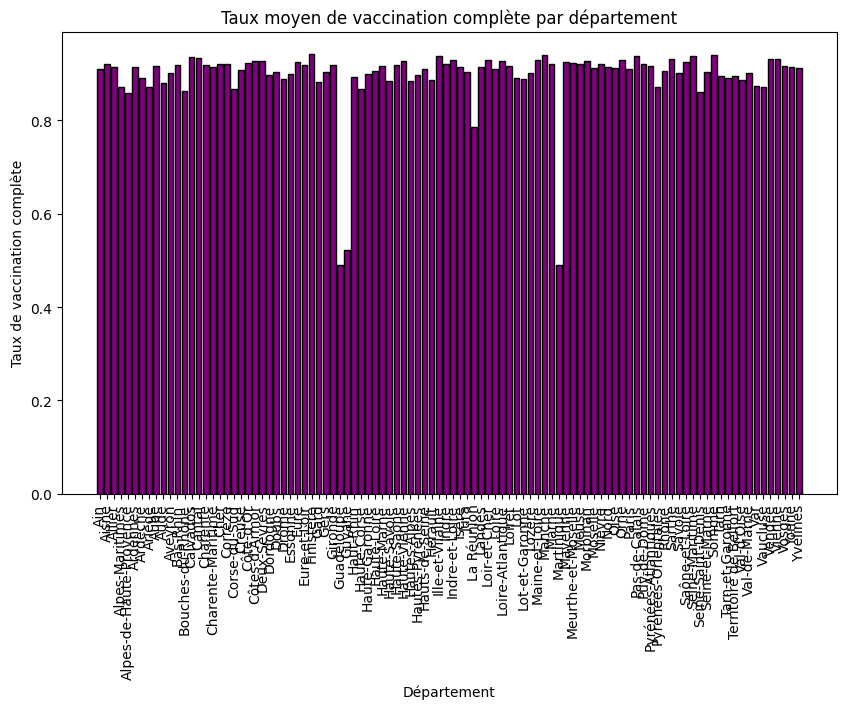

In [172]:
# Taux de vaccination complète par département:

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

pathologie_nettoyée=df[~ df['pathologie'].isin(exclusions)]
mask =pathologie_nettoyée['departement_residence']=='Tout département'
pathologie_nettoyée=pathologie_nettoyée[~ mask]

moyenne_taux_par_département = pathologie_nettoyée.groupby('libelle_departement')['taux_termine_pathologie'].mean()

plt.figure(figsize=(10, 6))
plt.bar(moyenne_taux_par_département.index, moyenne_taux_par_département.values, color='purple', edgecolor='black')
plt.xlabel('Département')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par département')
plt.xticks(rotation=90) 
plt.show()




Nous ne voyons pas grand chose, outre des taux bien inférieurs pour les départements d'Outre-mer. On peut essayer d'enlever les DOM pour s'intéresser uniquement au cas de la France métropolitaine.

## Remarque :
Nous plaçons un seuil à 90%. Les départements en rouge sont inférieurs au seuil, les départements en bleu en sont supérieurs.

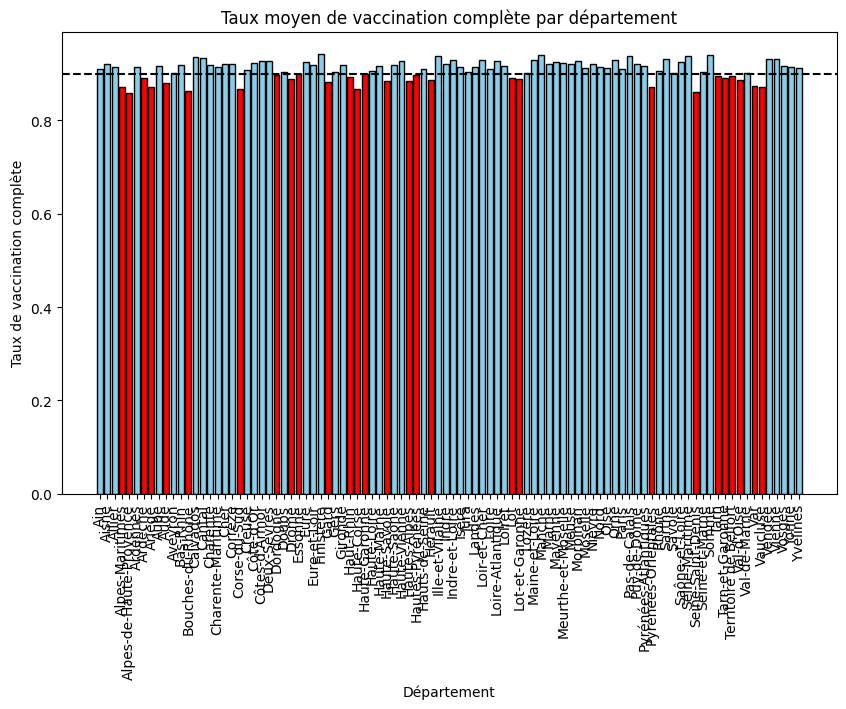

In [173]:
# Taux de vaccination complète par région (excepté les départements hors France métropolitaine):

exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]
hors_France_métro=['Guadeloupe','Guyane','Réunion', 'Martinique']
    
pathologie_nettoyée=df[~ df['pathologie'].isin(exclusions)]
mask =pathologie_nettoyée['departement_residence']=='Tout département'
pathologie_nettoyée=pathologie_nettoyée[~ mask]
pathologie_nettoyée=pathologie_nettoyée[~pathologie_nettoyée['libelle_region'].isin(hors_France_métro)]

moyenne_taux_par_département = pathologie_nettoyée.groupby('libelle_departement')['taux_termine_pathologie'].mean()

seuil = 0.9 # On définit le seuil à 90 %.

# On définit deux couleurs : rouge pour taux bas, bleu pour taux élevés
couleurs = ['red' if taux < seuil else 'skyblue' for taux in  moyenne_taux_par_département.values]

plt.figure(figsize=(10, 6)) 
plt.bar(moyenne_taux_par_département.index, moyenne_taux_par_département.values, color=couleurs, edgecolor='black')
plt.axhline(y=seuil, color='black', linestyle='--', label='Moyenne') # On définit une ligne délimitant le seuil choisi.
plt.xlabel('Département')
plt.ylabel('Taux de vaccination complète')
plt.title('Taux moyen de vaccination complète par département')
plt.xticks(rotation=90) 
plt.show()


On récupère la liste des départements dont le taux de vaccination est en dessous du seuil de 90%.

In [174]:
seuil_inférieur= moyenne_taux_par_département[moyenne_taux_par_département.values < seuil].index.tolist()
seuil_inférieur

['Alpes-Maritimes',
 'Alpes-de-Haute-Provence',
 'Ardèche',
 'Ariège',
 'Aude',
 'Bouches-du-Rhône',
 'Corse-du-Sud',
 'Dordogne',
 'Drôme',
 'Essonne',
 'Gard',
 'Haut-Rhin',
 'Haute-Corse',
 'Haute-Garonne',
 'Haute-Savoie',
 'Hautes-Alpes',
 'Hautes-Pyrénées',
 'Hérault',
 'Lot',
 'Lot-et-Garonne',
 'Pyrénées-Orientales',
 'Seine-Saint-Denis',
 'Tarn',
 'Tarn-et-Garonne',
 'Territoire de Belfort',
 "Val-d'Oise",
 'Var',
 'Vaucluse']

## Points communs : 
- Départements plutôt situés dans le Sud de la France = Alpes-Maritimes, Alpes-de-Haute-Provence, Aude, Bouches-du-Rhône, Corse-du-Sud, Drôme, Gard, Haute-Corse, Hautes-Alpes, Hautes-Pyrénées, Hérault, Pyrénées-Orientales, Var, Vaucluse
- Départements montagneux : Alpes-de-Haute-Provence, Hautes-Alpes, Haute-Savoie, Hautes-Pyrénées

## Interprétation : 
- Moins de vaccination dans le sud de la France = sensibilisation et accès aux soins peut-être moins importants
- Présence de montagne= peut rendre l’accès aux services de santé plus difficile pour certaines populations isolées.

In [176]:
import seaborn as sns

In [196]:
new=pathologie_nettoyée.groupby('libelle_departement').agg({
    'population_ref_cartographie': 'mean',  # Moyenne de la population
    'taux_termine_pathologie': 'mean'         # Moyenne du taux complet
}).reset_index()
new

,libelle_departement,population_ref_cartographie,taux_termine_pathologie
0,Ain,505020.0,0.909796
1,Aisne,411650.0,0.920500
2,Allier,274670.0,0.914583
3,Alpes-Maritimes,962630.0,0.871224
4,Alpes-de-Haute-Provence,138860.0,0.858833
...,...,...,...
91,Vendée,584560.0,0.931980
92,Vienne,345620.0,0.930458
93,Vosges,296210.0,0.916755
94,Yonne,266830.0,0.914583


In [197]:
# Attribuons la couleur jaune aux départements dont le taux de vaccination est inférieur au seuil de 90%. 

new['couleur'] = new['libelle_departement'].apply(
    lambda x: 'orange' if x in seuil_inférieur else 'grey'
)

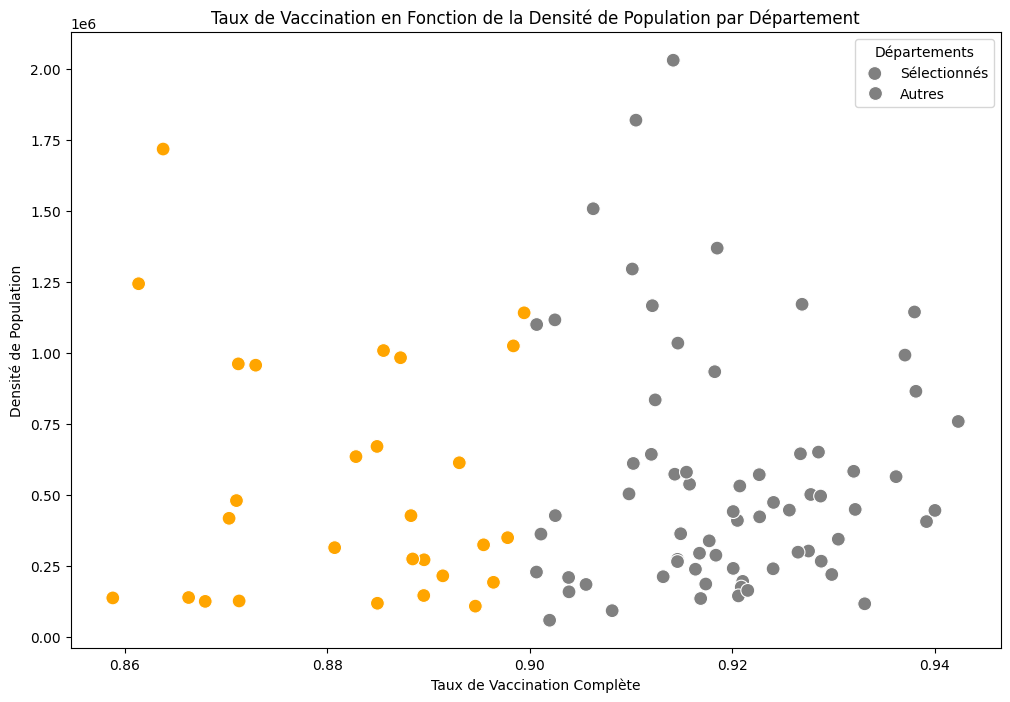

In [198]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=new, x='taux_termine_pathologie', y='population_ref_cartographie', hue='couleur', palette={'orange': 'orange', 'grey': 'grey'}, s=100)

plt.xlabel("Taux de Vaccination Complète")
plt.ylabel("Densité de Population")
plt.title("Taux de Vaccination en Fonction de la Densité de Population par Département")
plt.legend(title="Départements", labels=["Sélectionnés", "Autres"], loc='upper right')
plt.show()

## Interprétation :
Les départements dont le seuil est inférieur à 90% sont représentés en jaune, les autres sont en gris. On observe un cluster du groupe jaune vers la zone de faible densité de population mais cela est également le cas pour le groupe gris. On ne peut donc pas conclure sur un lien entre faible densité de population et diminuton du taux de vaccination.

# Taux de vaccination initial VS taux de vaccination complet :
Comparons maintenant le taux de vaccination initial (taux_1_inj_pathologie) par rapport au taux de vaccination complet (taux_termine_pathologie) afin de savoir si la série complète de dose est toujours respectée !

Pour cela, effectuons le rapport des deux taux. 
On utilise toujours le dataframe en enlevant les deux pathologies "Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés" et "Toutes pathologies de la catégorie" qui semblent mélanger plusieurs pathologies déjà présentes.

In [199]:
exclusions =["Au moins une pathologie hors tabagisme et troubles de l’humeur bénins à modérés", "Toutes pathologies de la catégorie"]

df2=df.copy()
df2=df2[~ df2['pathologie'].isin(exclusions)]
mask =df2['departement_residence']=='Tout département'
df2=df2[~ mask]
df2['taux_complet_parmi_1ere_dose']=df2['taux_termine_pathologie']/df2['taux_1_inj_pathologie']

min_valeur = df2['taux_complet_parmi_1ere_dose'].min()
max_valeur = df2['taux_complet_parmi_1ere_dose'].max()
print("La valeur minimale est :", min_valeur*100)
print("La valeur maximale est :", max_valeur*100)


La valeur minimale est : 89.89010989010988
La valeur maximale est : 100.0


In [200]:
lignes_min = df2[df2['taux_complet_parmi_1ere_dose'] == min_valeur]
lignes_max = df2[df2['taux_complet_parmi_1ere_dose'] == max_valeur]
N=len(df2['pathologie'].tolist())

print("Il y a ",len(lignes_min['pathologie'].tolist()), "cas sur", N, "qui possède le taux de complétude le plus faible de 89,9%." )
print("Il s'agit de la", lignes_min['pathologie'].tolist()[0], "en",  lignes_min['libelle_departement'].tolist()[0],".")
print("Il y a",len(lignes_max['pathologie'].tolist()),"cas sur", N, "dont le taux de complétude du vaccin est de 100%.")

Il y a  1 cas sur 5000 qui possède le taux de complétude le plus faible de 89,9%.
Il s'agit de la Myopathie ou myasthénie en Guyane .
Il y a 532 cas sur 5000 dont le taux de complétude du vaccin est de 100%.


## Interprétation:
Seulement 10% des départements respecte à 100% la série complète de dose ! Ainsi, dans la plupart des cas, il existe une proportion faible de patients qui commencent à faire la première dose de vaccin mais ne terminent jamais, ce qui rend la vaccination inefficiente et inutile.

Le pire taux de complétude (de 89,9%) est atteint en Guyane pour la myopathie/myasthénie, maladies neurovasculaires qui se caractérisent par une fragilité des muscles. A nouveau, les départements d'Outre-mer sont plus vulnérables à une inefficacité de la prise de vaccin. On peut de la même façon que précedemment faire le lien avec des infrastructures médicales moins développées et des campagnes de préventions limitées par des difficultés économiques et une méfiance locale.

Il faut donc centrer ses efforts sur ces territoires plus isolés et fragiles afin d'atteindre une équité territoriale.